In [7]:
from keras.utils import np_utils
from keras.datasets import mnist, cifar10
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.optimizers import Adam
from keras.losses import CategoricalCrossentropy
import numpy as np
import matplotlib.pyplot as plt


In [2]:
# 1. 데이터 셋 만들기
(x_train, y_train), (x_test,y_test) = cifar10.load_data()

ind = np.random.choice(50000,50000,replace=False)

tr_ind = ind[:40000]
val_ind = ind[40000:]
train_x = x_train[tr_ind]
val_x = x_train[val_ind]
train_y = y_train[tr_ind]
val_y = y_train[val_ind]

train_x = train_x.reshape(-1,32*32*3).astype('float32')/255
val_x = val_x.reshape(-1,32*32*3).astype('float32')/255.
test_x = x_test.reshape(-1,32*32*3).astype('float32')/255.
train_y = np_utils.to_categorical(train_y)
val_y = np_utils.to_categorical(val_y)
test_y = np_utils.to_categorical(y_test)

170500096/170498071 [==============================] - 2s 0us/step


In [3]:
# 2. 모델생성
model = Sequential()
model.add(Dense(1024,input_dim=train_x.shape[1],activation='relu'))
model.add(Dense(255,activation='relu'))
model.add(Dense(10,activation='softmax'))

In [4]:
# 3 모델설정
model.compile(loss='categorical_crossentropy',
             optimizer='Nadam',metrics=['accuracy'])

In [5]:
# 4. 모델 학습
history = model.fit(train_x, train_y, epochs=20,batch_size=100,
                    validation_data=(val_x,val_y))

Epoch 1/20
400/400 [==============================] - 41s 99ms/step - loss: 2.2826 - accuracy: 0.2370 - val_loss: 1.7773 - val_accuracy: 0.3671
Epoch 2/20
400/400 [==============================] - 40s 99ms/step - loss: 1.7493 - accuracy: 0.3744 - val_loss: 1.6481 - val_accuracy: 0.4166
Epoch 3/20
400/400 [==============================] - 40s 100ms/step - loss: 1.6401 - accuracy: 0.4139 - val_loss: 1.5929 - val_accuracy: 0.4385
Epoch 4/20
400/400 [==============================] - 39s 97ms/step - loss: 1.5613 - accuracy: 0.4477 - val_loss: 1.5696 - val_accuracy: 0.4397
Epoch 5/20
400/400 [==============================] - 39s 97ms/step - loss: 1.5067 - accuracy: 0.4654 - val_loss: 1.5679 - val_accuracy: 0.4516
Epoch 6/20
400/400 [==============================] - 39s 97ms/step - loss: 1.4491 - accuracy: 0.4842 - val_loss: 1.5467 - val_accuracy: 0.4606
Epoch 7/20
400/400 [==============================] - 39s 99ms/step - loss: 1.4097 - accuracy: 0.4993 - val_loss: 1.4548 - val_accuracy

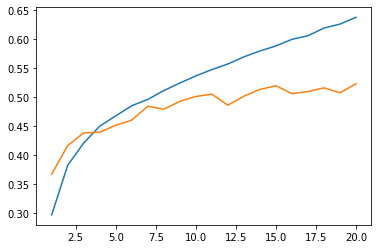

In [8]:
# 5. 학습과정
tr_acc = history.history['accuracy']
tr_loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']

plt.plot(range(1,21),tr_acc)
plt.plot(range(1,21),val_acc)

In [9]:
# 6. 모델 평가
model.evaluate(test_x, test_y)

313/313 [==============================] - 3s 10ms/step - loss: 1.4292 - accuracy: 0.5215


[1.4292032718658447, 0.5214999914169312]

실제값:  3 예측값:  5


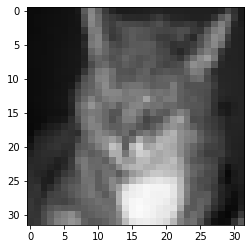

실제값:  5 예측값:  5


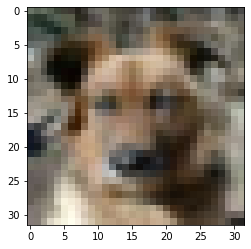

실제값:  3 예측값:  3


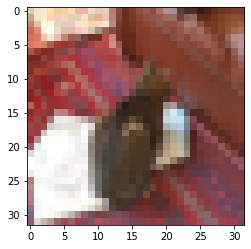

실제값:  0 예측값:  8


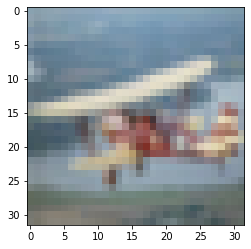

실제값:  3 예측값:  3


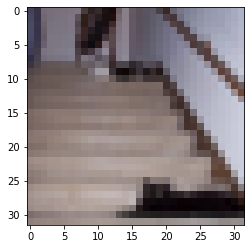

In [12]:
# 7. 모델 사용
test_inds = np.random.choice(10000, 5, replace = False)
for test_ind in test_inds:
    plt.imshow(test_x[test_ind].reshape(32,32,3))
    real = np.argmax(test_y[test_ind])
    pred = np.argmax(model.predict(test_x[test_ind].reshape(-1,3072)))
    print('실제값: ', real, '예측값: ', pred)
    plt.show()